In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
master_df = pd.read_csv('../data/master_dataset_preds.csv')
master_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,T10Y2Y_Ten_Two,Date_lag_Ten_Two,...,Volume_USL,Date_lag_USL,Open_lag_USL,High_lag_USL,Low_lag_USL,Close_lag_USL,Adj Close_lag_USL,Volume_lag_USL,actual_high_open,pred_high_open
0,0,2006-04-10 00:00:00,546.000000,548.000000,541.359985,544.159973,544.159973,484738,0.08,1 days 00:00:00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.933818
1,1,2006-04-11 00:00:00,546.559998,547.119995,538.400024,545.599976,545.599976,162138,0.05,3 days 00:00:00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.559997,2.233155
2,2,2006-04-12 00:00:00,545.760010,550.479980,542.479980,542.719971,542.719971,156038,0.07,1 days 00:00:00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.719970,3.341186
3,3,2006-04-13 00:00:00,540.000000,551.919983,539.200012,550.559998,550.559998,70088,0.09,1 days 00:00:00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.919983,8.414180
4,4,2006-04-17 00:00:00,553.599976,559.200012,549.440002,558.320007,558.320007,114713,0.1,1 days 00:00:00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.600036,5.078773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,4414,2023-10-23 00:00:00,80.220001,80.269997,78.349998,78.889999,78.889999,4607100,-0.19,1 days 00:00:00,...,29300.0,1 days 00:00:00,0.739998,0.040001,0.309998,-0.469997,-0.469997,1900.0,0.049996,0.570761
4415,4415,2023-10-24 00:00:00,78.040001,78.220001,76.309998,76.930000,76.930000,6629600,-0.19,3 days 00:00:00,...,12600.0,3 days 00:00:00,-0.500000,-0.560001,-0.779999,-0.640003,-0.640003,23100.0,0.180000,0.869047
4416,4416,2023-10-25 00:00:00,77.110001,78.730003,75.639999,78.459999,78.459999,6116800,-0.13,1 days 00:00:00,...,67700.0,1 days 00:00:00,-0.849998,-0.919998,-0.799999,-0.689999,-0.689999,-16700.0,1.620002,1.120784
4417,4417,2023-10-26 00:00:00,76.830002,77.589996,76.489998,76.889999,76.889999,3518500,-0.16,1 days 00:00:00,...,75400.0,1 days 00:00:00,-0.300000,0.509998,-0.170002,0.730000,0.730000,55100.0,0.759994,0.671413


In [19]:
master_df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Open_DXY,High_DXY,Low_DXY,...,Adj Close_USL,Volume_USL,Open_lag_USL,High_lag_USL,Low_lag_USL,Close_lag_USL,Adj Close_lag_USL,Volume_lag_USL,actual_high_open,pred_high_open
count,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,...,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000,4419.000000
mean,2209.000000,221.396468,223.871874,218.679572,221.381613,221.381613,2.870512e+06,88.874116,89.201541,88.568108,...,29.295556,6.810457e+04,-0.002589,-0.002510,-0.002544,-0.002555,-0.002555,1.656483e+01,2.475406,2.479111
std,1275.799749,175.137430,177.202960,172.744152,175.094137,175.094137,3.987277e+06,9.576706,9.590827,9.557777,...,15.461650,2.138550e+05,0.698189,0.608051,0.649247,0.646771,0.646771,1.052294e+05,3.732379,3.088348
min,0.000000,17.280001,18.000000,16.879999,17.040001,17.040001,1.488800e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,-5.290001,-4.770000,-8.740001,-6.230000,-6.230000,-1.648600e+06,0.000000,0.084557
25%,1104.500000,81.680000,82.559998,80.869999,81.759998,81.759998,9.052875e+05,80.489998,80.730003,80.230003,...,19.490000,6.900000e+03,-0.260000,-0.220001,-0.229999,-0.235001,-0.235001,-1.260000e+04,0.480003,0.840191
50%,2209.000000,162.960007,164.559998,161.119995,163.199997,163.199997,2.062800e+06,89.519997,89.820000,89.360001,...,28.750000,2.550000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.199997,1.489777
75%,3313.500000,302.160004,304.600007,299.080002,302.000000,302.000000,3.747562e+06,96.689999,96.994999,96.400002,...,40.110001,6.680000e+04,0.289998,0.240002,0.260001,0.275000,0.275000,1.200000e+04,2.880004,2.896512
max,4418.000000,952.640015,953.359985,932.000000,939.840027,939.840027,1.249130e+08,114.190002,114.779999,113.330002,...,87.849998,5.075300e+06,5.209999,5.489997,5.959999,5.799995,5.799995,3.041500e+06,45.439987,37.112050


In [20]:
master_df[-500:].describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Open_DXY,High_DXY,Low_DXY,...,Adj Close_USL,Volume_USL,Open_lag_USL,High_lag_USL,Low_lag_USL,Close_lag_USL,Adj Close_lag_USL,Volume_lag_USL,actual_high_open,pred_high_open
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4168.500000,69.831880,70.666820,68.881340,69.795640,69.795640,4.765125e+06,103.049100,103.452800,102.680480,...,35.160140,43285.600000,0.020340,0.020420,0.020400,0.020100,0.020100,65.400000,0.834940,0.847454
std,144.481833,8.385104,8.484702,8.221357,8.377450,8.377450,3.274196e+06,4.466939,4.551998,4.356244,...,3.864008,52975.278318,0.817137,0.705639,0.778925,0.793224,0.793224,52520.931822,0.694964,0.377785
min,3919.000000,46.529999,48.599998,46.160000,47.040001,47.040001,1.220800e+06,93.860001,94.129997,93.820000,...,24.389999,1500.000000,-2.539997,-2.810002,-3.869999,-4.460003,-4.460003,-363500.000000,0.000000,0.084557
25%,4043.750000,64.585001,65.195000,63.684999,64.417500,64.417500,2.888950e+06,100.844999,101.295002,100.540003,...,32.792499,13900.000000,-0.462500,-0.320001,-0.392500,-0.410000,-0.410000,-12225.000000,0.299998,0.596295
50%,4168.500000,70.344997,71.084999,69.485000,70.174999,70.174999,3.933550e+06,103.325001,103.635002,103.000000,...,35.270000,25400.000000,0.090000,0.110000,0.099998,0.059998,0.059998,1100.000000,0.684997,0.731773
75%,4293.250000,75.832500,76.645001,74.317503,75.432499,75.432499,5.538050e+06,105.669998,106.134998,105.320000,...,37.730000,51700.000000,0.530000,0.450001,0.450001,0.502502,0.502502,12100.000000,1.189995,1.014102
max,4418.000000,91.029999,92.199997,90.720001,91.989998,91.989998,2.993460e+07,114.190002,114.779999,113.330002,...,45.410000,452400.000000,2.799999,2.040001,2.500000,2.520001,2.520001,325200.000000,4.129997,3.289269


In [21]:
num_test_days = 60
total_days = master_df.shape[0]

num_train_days = total_days - num_test_days
train_df = master_df.iloc[:num_train_days]
test_df = master_df.iloc[num_train_days:]

print(total_days)
print(train_df.shape)
print(test_df.shape)

4419
(4359, 78)
(60, 78)


## Simple Long Or Nothing Day Trading Strategy

In [20]:
def long_nothing_day_strategy(df, delta_percent=0.0001):
    pnl = []

    num_profit_days = 0
    num_loss_days = 0
    num_neutral_days = 0

    for day, day_info in df.iterrows():
        predicted_delta = day_info['pred_high_open']
        actual_delta = day_info['actual_high_open']
        open = day_info['Open']
        
        delta = delta_percent * open

        if predicted_delta >= delta:
            pnl.append(actual_delta)

            if actual_delta > 0:
                num_profit_days += 1
            elif actual_delta < 0:
                num_loss_days += 1
            else:
                num_neutral_days +=1

        else:
            pnl.append(0)
            num_neutral_days += 1
    

    return pnl, num_profit_days, num_loss_days, num_neutral_days
   

Delta = 0.0% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.01% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.02% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.030000000000000002% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.04% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.05% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.060000000000000005% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.06999999999999999% ====> Average PNL = 2.5015139456297293$, Profitable Days = 4274, Lossy Days = 0, Neutral Days = 85
Delta = 0.08% ====> Average PNL = 2.50151394562972

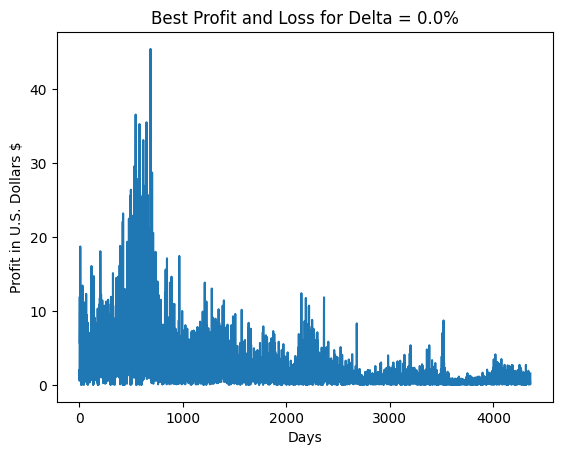

In [28]:
delta_percents = np.arange(0, 0.001, 0.0001)

best_avg_pnl = -1 * float('inf')
best_delta_percent = None
best_pnl = None
best_profit_days = None
best_loss_days = None
best_neutral_days = None

for delta_percent in delta_percents:
    pnl, num_profit_days, num_loss_days, num_neutral_days = long_nothing_day_strategy(train_df, delta_percent=delta_percent)
   
    avg_pnl = sum(pnl) / len(pnl)

    if avg_pnl > best_avg_pnl:
        best_avg_pnl = avg_pnl
        best_delta_percent = delta_percent
        best_pnl = pnl
        best_profit_days = num_profit_days
        best_loss_days = num_loss_days
        best_neutral_days = num_neutral_days

    print(f"Delta = {delta_percent*100}% ====> Average PNL = {avg_pnl}$, Profitable Days = {num_profit_days}, Lossy Days = {num_loss_days}, Neutral Days = {num_neutral_days}")

print()

print(f'Best Delta = {best_delta_percent*100}% ===> Best Average PNL = {best_avg_pnl}$, Profitable Days = {best_profit_days}, Lossy Days = {best_loss_days}, Neutral Days = {best_neutral_days}')

plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(best_pnl)


Delta = 0.0% ===> Test Average PNL = 0.5786663000000002$, Profitable Days = 58, Lossy Days = 0, Neutral Days = 2


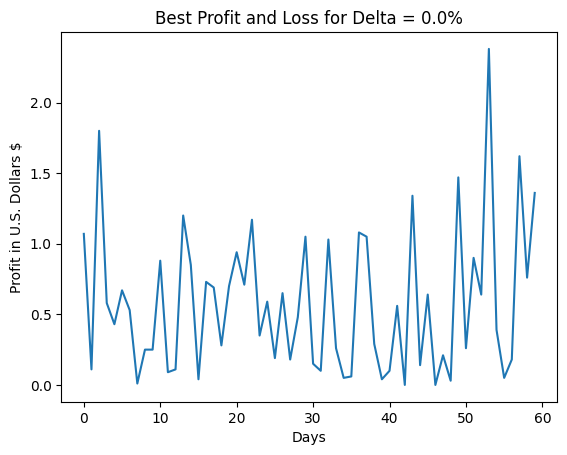

In [30]:
test_pnl, test_num_profit_days, test_num_loss_days, test_num_neutral_days = long_nothing_day_strategy(test_df, delta_percent=best_delta_percent)

test_avg_pnl = sum(test_pnl) / len(test_pnl)

print(f'Delta = {best_delta_percent*100}% ===> Test Average PNL = {test_avg_pnl}$, Profitable Days = {test_num_profit_days}, Lossy Days = {test_num_loss_days}, Neutral Days = {test_num_neutral_days}')


plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(test_pnl)

## Capital-based Long or Nothing Strategy

In [70]:
def sig(x):
    return 1/(1 + np.exp(-x))

def capital_long_nothing_strategy(df, capital=10000, delta_percent=0):
    pnl = []

    num_profit_days = 0
    num_loss_days = 0
    num_neutral_days = 0

    for day, day_info in df.iterrows():
        predicted_delta = day_info['pred_high_open']
        actual_delta = day_info['actual_high_open']
        open = day_info['Open']
        
        max_shares_buy = capital // open

        # print("Max shares buy:", max_shares_buy)
        
        threshold_delta = delta_percent * open

        if predicted_delta >= threshold_delta:

            if threshold_delta !=0:
                long_strength = predicted_delta
                shares_to_invest = sig(long_strength) * max_shares_buy
            else:
                shares_to_invest = max_shares_buy

            pnl_in_day = shares_to_invest * actual_delta
            pnl.append(pnl_in_day)

            capital += pnl_in_day

            # print(capital, shares_to_invest, actual_delta, predicted_delta)

            if actual_delta > 0:
                num_profit_days += 1
            elif actual_delta < 0:
                num_loss_days += 1
            else:
                num_neutral_days +=1

        else:
            pnl.append(0)
            num_neutral_days += 1
    

    return pnl, num_profit_days, num_loss_days, num_neutral_days, capital
   

Delta = 0.0% ====> Sum PNL = 2051048.2922039994$, Average PNL = 4102.096584407998$, Capital = 2061048.2922039994$, Profitable Days = 487, Lossy Days = 0, Neutral Days = 13
Delta = 1.0% ====> Sum PNL = 198197.30925357502$, Average PNL = 396.39461850715$, Capital = 208197.30925357493$, Profitable Days = 193, Lossy Days = 0, Neutral Days = 307
Delta = 2.0% ====> Sum PNL = 2597.5948132395597$, Average PNL = 5.195189626479119$, Capital = 12597.594813239559$, Profitable Days = 8, Lossy Days = 0, Neutral Days = 492
Delta = 3.0% ====> Sum PNL = 0$, Average PNL = 0.0$, Capital = 10000$, Profitable Days = 0, Lossy Days = 0, Neutral Days = 500
Delta = 4.0% ====> Sum PNL = 0$, Average PNL = 0.0$, Capital = 10000$, Profitable Days = 0, Lossy Days = 0, Neutral Days = 500
Delta = 5.0% ====> Sum PNL = 0$, Average PNL = 0.0$, Capital = 10000$, Profitable Days = 0, Lossy Days = 0, Neutral Days = 500
Delta = 6.0% ====> Sum PNL = 0$, Average PNL = 0.0$, Capital = 10000$, Profitable Days = 0, Lossy Days = 

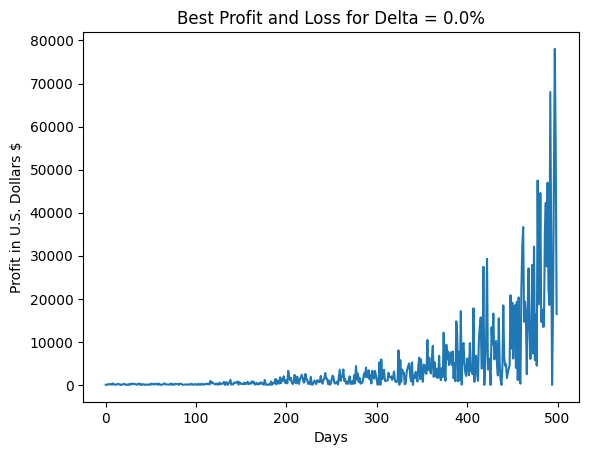

In [72]:
delta_percents = np.arange(0, 0.1, 0.01)

best_avg_pnl = -1 * float('inf')
best_delta_percent = None
best_pnl = None
best_profit_days = None
best_loss_days = None
best_neutral_days = None
best_capital = None

for delta_percent in delta_percents:
    pnl, num_profit_days, num_loss_days, num_neutral_days, capital = capital_long_nothing_strategy(train_df[:500], delta_percent=delta_percent)
   
    avg_pnl = sum(pnl) / len(pnl)

    if avg_pnl > best_avg_pnl:
        best_avg_pnl = avg_pnl
        best_delta_percent = delta_percent
        best_pnl = pnl
        best_profit_days = num_profit_days
        best_loss_days = num_loss_days
        best_neutral_days = num_neutral_days
        best_capital = capital

    print(f"Delta = {delta_percent*100}% ====> Sum PNL = {sum(pnl)}$, Average PNL = {avg_pnl}$, Capital = {capital}$, Profitable Days = {num_profit_days}, Lossy Days = {num_loss_days}, Neutral Days = {num_neutral_days}")

print()

print(f'Best Delta = {best_delta_percent*100}% ===> Best Average PNL = {best_avg_pnl}$, Capital = {best_capital}$, Profitable Days = {best_profit_days}, Lossy Days = {best_loss_days}, Neutral Days = {best_neutral_days}')

plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(best_pnl)

Delta = 0.0% ===> Test Average PNL = 75.28045025000003$, Capital = 10000$, Profitable Days = 58, Lossy Days = 0, Neutral Days = 2


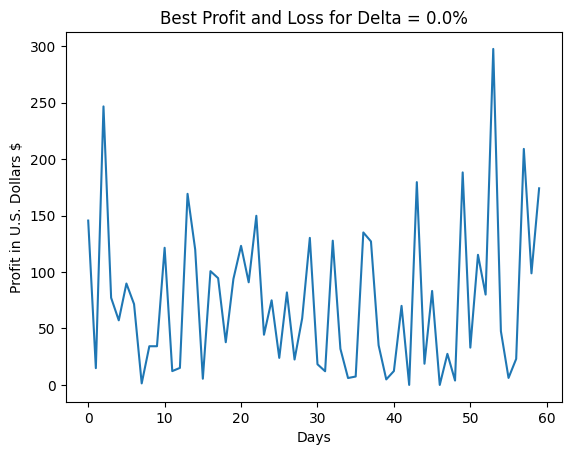

In [67]:
test_pnl, test_num_profit_days, test_num_loss_days, test_num_neutral_days, capital = capital_long_nothing_strategy(test_df, delta_percent=best_delta_percent)

test_avg_pnl = sum(test_pnl) / len(test_pnl)

print(f'Delta = {best_delta_percent*100}% ===> Test Average PNL = {test_avg_pnl}$, Capital = {capital}$, Profitable Days = {test_num_profit_days}, Lossy Days = {test_num_loss_days}, Neutral Days = {test_num_neutral_days}')


plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(test_pnl)

## Blind Strat

In [23]:
df = master_df[['Open', 'High', 'actual_high_open', 'pred_high_open', 'Close']]

In [24]:
df

,Open,High,actual_high_open,pred_high_open,Close
0,546.000000,548.000000,2.000000,2.933818,544.159973
1,546.559998,547.119995,0.559997,2.233155,545.599976
2,545.760010,550.479980,4.719970,3.341186,542.719971
3,540.000000,551.919983,11.919983,8.414180,550.559998
4,553.599976,559.200012,5.600036,5.078773,558.320007
...,...,...,...,...,...
4414,80.220001,80.269997,0.049996,0.570761,78.889999
4415,78.040001,78.220001,0.180000,0.869047,76.930000
4416,77.110001,78.730003,1.620002,1.120784,78.459999
4417,76.830002,77.589996,0.759994,0.671413,76.889999


In [31]:
def blind_strat(df, delta_percent=0.0001):
    pnl = []

    num_profit_days = 0
    num_loss_days = 0
    num_neutral_days = 0

    for day, day_info in df.iterrows():
        # Sell at high else close strat
        predicted_delta = day_info['pred_high_open']
        actual_delta = day_info['actual_high_open']
        open = day_info['Open']
        close = day_info['Close']
        
        delta = delta_percent * open

        # If our prediction is greater than the threshold, trade
        day_return = 0
        if predicted_delta >= delta:
            # If we hit our high, then sell
            if actual_delta <= predicted_delta:
                day_return = actual_delta
                pnl.append(actual_delta)
            else:
                day_return = open-close
                pnl.append(open-close)

            if day_return > 0:
                num_profit_days += 1
            elif day_return < 0:
                num_loss_days += 1
            else:
                num_neutral_days += 1

        else:
            pnl.append(0)
            num_neutral_days += 1

    return pnl, num_profit_days, num_loss_days, num_neutral_days

Delta = 0.0% ====> Average PNL = -0.25072697224134005$, Profitable Days = 2709, Lossy Days = 1547, Neutral Days = 103, Sum PnL = -1092.9188720000013
Delta = 1.0% ====> Average PNL = -0.4194309871530166$, Profitable Days = 1116, Lossy Days = 946, Neutral Days = 2297, Sum PnL = -1828.2996729999993
Delta = 2.0% ====> Average PNL = -0.28307868960770777$, Profitable Days = 146, Lossy Days = 229, Neutral Days = 3984, Sum PnL = -1233.9400079999982
Delta = 3.0% ====> Average PNL = -0.1554484466620784$, Profitable Days = 53, Lossy Days = 88, Neutral Days = 4218, Sum PnL = -677.5997789999998
Delta = 4.0% ====> Average PNL = -0.0801583058040835$, Profitable Days = 22, Lossy Days = 43, Neutral Days = 4294, Sum PnL = -349.41005499999994
Delta = 5.0% ====> Average PNL = -0.03895160105528791$, Profitable Days = 14, Lossy Days = 21, Neutral Days = 4324, Sum PnL = -169.790029
Delta = 6.0% ====> Average PNL = -0.027756372791924763$, Profitable Days = 10, Lossy Days = 13, Neutral Days = 4336, Sum PnL = -

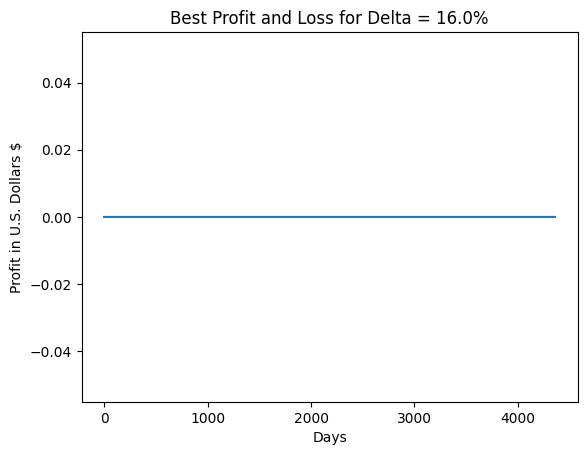

In [42]:
delta_percents = np.arange(0, 0.2, 0.01)

best_avg_pnl = -1 * float('inf')
best_delta_percent = None
best_pnl = None
best_profit_days = None
best_loss_days = None
best_neutral_days = None

for delta_percent in delta_percents:
    pnl, num_profit_days, num_loss_days, num_neutral_days = blind_strat(train_df, delta_percent=delta_percent)
   
    avg_pnl = sum(pnl) / len(pnl)

    if avg_pnl > best_avg_pnl:
        best_avg_pnl = avg_pnl
        best_delta_percent = delta_percent
        best_pnl = pnl
        best_profit_days = num_profit_days
        best_loss_days = num_loss_days
        best_neutral_days = num_neutral_days

    print(f"Delta = {delta_percent*100}% ====> Average PNL = {avg_pnl}$, Profitable Days = {num_profit_days}, Lossy Days = {num_loss_days}, Neutral Days = {num_neutral_days}, Sum PnL = {sum(pnl)}")

print()

print(f'Best Delta = {best_delta_percent*100}% ===> Best Average PNL = {best_avg_pnl}$, Profitable Days = {best_profit_days}, Lossy Days = {best_loss_days}, Neutral Days = {best_neutral_days}')

plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(best_pnl)


Delta = 16.0% ===> Test Average PNL = 0.0$, Profitable Days = 0, Lossy Days = 0, Neutral Days = 60, Sum PNL = 0


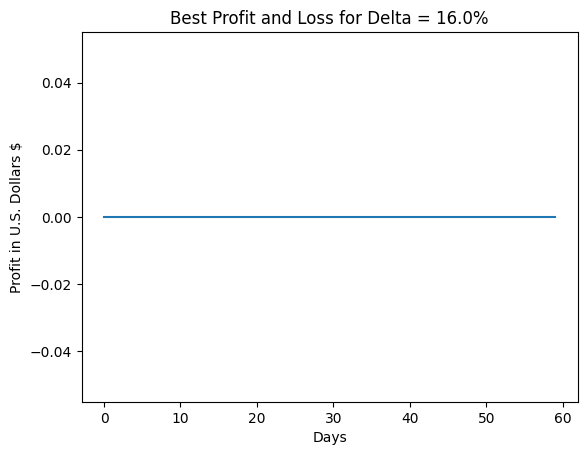

In [43]:
test_pnl, test_num_profit_days, test_num_loss_days, test_num_neutral_days = blind_strat(test_df, delta_percent=best_delta_percent)

test_avg_pnl = sum(test_pnl) / len(test_pnl)

print(f'Delta = {best_delta_percent*100}% ===> Test Average PNL = {test_avg_pnl}$, Profitable Days = {test_num_profit_days}, Lossy Days = {test_num_loss_days}, Neutral Days = {test_num_neutral_days}, Sum PNL = {sum(pnl)}')


plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(test_pnl)

## Stop Loss Strat

In [82]:
def stoploss_strat(df, delta_percent=0.0001, cap_alloc_limit=0.5):
    pnl = []

    capital = 10000

    num_profit_days = 0
    num_loss_days = 0
    num_neutral_days = 0

    for day, day_info in df.iterrows():
        # Sell at high else close strat
        predicted_delta = day_info['pred_high_open']
        actual_delta = day_info['actual_high_open']
        open = day_info['Open']
        close = day_info['Close']
        
        delta = delta_percent * open

        # If our prediction is greater than the threshold, trade
        day_return = 0
        if predicted_delta >= delta:
            # If we hit our high, then sell
            if actual_delta >= predicted_delta:
                day_return = predicted_delta
                # Shares to buy
                num_shares = (capital * cap_alloc_limit) / open
                capital += math.floor(num_shares) * day_return

                pnl.append(predicted_delta)
            else:
                day_return = open-close
                num_shares = (capital * cap_alloc_limit) / open
                capital += math.floor(num_shares) * day_return
                
                pnl.append(open-close)

            if day_return > 0:
                num_profit_days += 1
            elif day_return < 0:
                num_loss_days += 1
            else:
                num_neutral_days += 1

        else:
            pnl.append(0)
            num_neutral_days += 1
    print("Capital =", capital)
    return pnl, num_profit_days, num_loss_days, num_neutral_days

Capital = 41276528537556.29
Delta = 0.0% ====> Average PNL = 2.2630467733677495$, Profitable Days = 3637, Lossy Days = 680, Neutral Days = 42, Sum PnL = 9864.62088511002
Capital = 6647497981.681503
Delta = 1.0% ====> Average PNL = 1.2395443737003877$, Profitable Days = 1718, Lossy Days = 358, Neutral Days = 2283, Sum PnL = 5403.1739249599905
Capital = 734467.0115486498
Delta = 2.0% ====> Average PNL = 0.4760331899472354$, Profitable Days = 313, Lossy Days = 62, Neutral Days = 3984, Sum PnL = 2075.0286749799993
Capital = 89875.09906539996
Delta = 3.0% ====> Average PNL = 0.24209482424868084$, Profitable Days = 116, Lossy Days = 25, Neutral Days = 4218, Sum PnL = 1055.2913388999998
Capital = 36856.7845258
Delta = 4.0% ====> Average PNL = 0.12054930295939434$, Profitable Days = 55, Lossy Days = 11, Neutral Days = 4293, Sum PnL = 525.4744115999999
Capital = 23831.082350299992
Delta = 5.0% ====> Average PNL = 0.06129507276898371$, Profitable Days = 30, Lossy Days = 6, Neutral Days = 4323, S

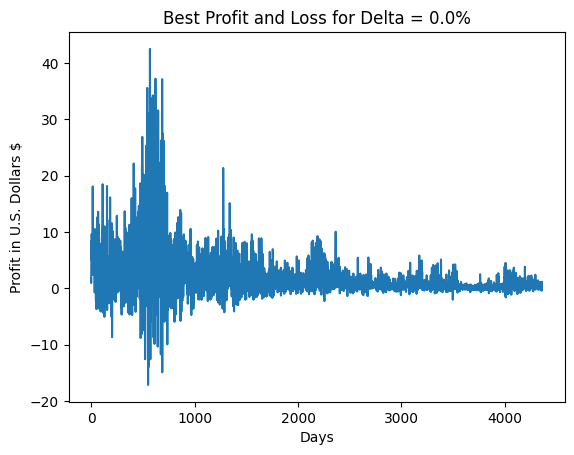

In [83]:
delta_percents = np.arange(0, 0.2, 0.01)

best_avg_pnl = -1 * float('inf')
best_delta_percent = None
best_pnl = None
best_profit_days = None
best_loss_days = None
best_neutral_days = None

for delta_percent in delta_percents:
    pnl, num_profit_days, num_loss_days, num_neutral_days = stoploss_strat(train_df, delta_percent=delta_percent)
   
    avg_pnl = sum(pnl) / len(pnl)

    if avg_pnl > best_avg_pnl:
        best_avg_pnl = avg_pnl
        best_delta_percent = delta_percent
        best_pnl = pnl
        best_profit_days = num_profit_days
        best_loss_days = num_loss_days
        best_neutral_days = num_neutral_days

    print(f"Delta = {delta_percent*100}% ====> Average PNL = {avg_pnl}$, Profitable Days = {num_profit_days}, Lossy Days = {num_loss_days}, Neutral Days = {num_neutral_days}, Sum PnL = {sum(pnl)}")

print()

print(f'Best Delta = {best_delta_percent*100}% ===> Best Average PNL = {best_avg_pnl}$, Profitable Days = {best_profit_days}, Lossy Days = {best_loss_days}, Neutral Days = {best_neutral_days}')

plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(best_pnl)


Capital = 12567.317100030008
Delta = 0.0% ===> Test Average PNL = 0.5934746313333341$, Profitable Days = 52, Lossy Days = 8, Neutral Days = 0, Sum PNL = 35.608477880000045


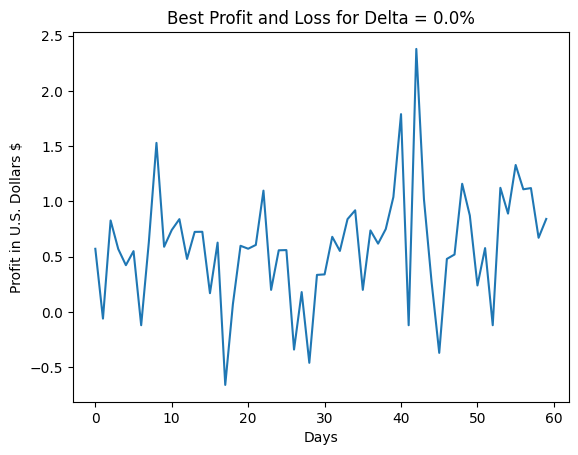

In [85]:
test_pnl, test_num_profit_days, test_num_loss_days, test_num_neutral_days = stoploss_strat(test_df, delta_percent=best_delta_percent)

test_avg_pnl = sum(test_pnl) / len(test_pnl)

print(f'Delta = {best_delta_percent*100}% ===> Test Average PNL = {test_avg_pnl}$, Profitable Days = {test_num_profit_days}, Lossy Days = {test_num_loss_days}, Neutral Days = {test_num_neutral_days}, Sum PNL = {sum(test_pnl)}')


plt.title(f'Best Profit and Loss for Delta = {best_delta_percent*100}%')
plt.xlabel('Days')
plt.ylabel('Profit in U.S. Dollars $')
plt.plot(test_pnl)